# Diamond Price Regression 

# Intorduction

We will predict the value of diamonds using regression techniques, focusing on features like carat, cut, and clarity. If suitable, we'll explore deep learning models to enhance prediction accuracy.

Türkçe:
Elmasların değerini, karat, kesim ve berraklık gibi özelliklere dayanarak regresyon teknikleri kullanarak tahmin edeceğiz. Uygun olduğu takdirde, tahmin doğruluğunu artırmak için derin öğrenme modellerini de inceleyeceğiz.

<img src='https://thumbs.dreamstime.com/b/diamond-black-background-ai-generated-image-269859536.jpg'>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("diamonds.csv").drop(columns=['Unnamed: 0'])
df = df.sample(n=5000, random_state=42)

### Basic information


# Kolon bilgisi

carat: Elmasın ağırlığı.
cut: Elmasın kesim kalitesi (ör. Fair, Good, Very Good, Premium, Ideal).

color: Elmasın renk derecesi, genellikle D (renksiz) ile J (hafif renk) arasında değişir.

clarity: Elmasın berraklık derecesi, iç veya dış kusurların varlığını gösterir (ör. I1, SI1, VS1, VVS1, IF).

depth: Toplam derinlik yüzdesi, (z / mean(x, y)) * 100 olarak hesaplanır.

table: Elmasın üst yüzeyinin genişliği, en geniş noktasına göre.

price: Elmasın ABD doları cinsinden fiyatı.

x: Elmasın uzunluğu (milimetre cinsinden).
y: Elmasın genişliği (milimetre cinsinden).
z: Elmasın derinliği (milimetre cinsinden).

In [2]:
df.head(10)

carat        cut color clarity  depth  table  price     x     y     z
1388    0.24      Ideal     G    VVS1   62.1   56.0    559  3.97  4.00  2.47
50052   0.58  Very Good     F    VVS2   60.0   57.0   2201  5.44  5.42  3.26
41645   0.40      Ideal     E    VVS2   62.1   55.0   1238  4.76  4.74  2.95
42377   0.43    Premium     E    VVS2   60.8   57.0   1304  4.92  4.89  2.98
17244   1.55      Ideal     E     SI2   62.3   55.0   6901  7.44  7.37  4.61
1608    1.00       Fair     E     SI2   55.4   62.0   3011  6.63  6.59  3.66
46398   0.51      Ideal     F     VS1   60.2   56.0   1765  5.22  5.24  3.15
45493   0.52      Ideal     D     VS2   62.0   56.0   1679  5.17  5.19  3.21
49385   0.62    Premium     E     VS2   60.0   59.0   2102  5.58  5.56  3.34
10460   1.14      Ideal     H     SI1   60.3   57.0   4789  6.79  6.85  4.11

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1388 to 7126
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    5000 non-null   float64
 1   cut      5000 non-null   object 
 2   color    5000 non-null   object 
 3   clarity  5000 non-null   object 
 4   depth    5000 non-null   float64
 5   table    5000 non-null   float64
 6   price    5000 non-null   int64  
 7   x        5000 non-null   float64
 8   y        5000 non-null   float64
 9   z        5000 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 429.7+ KB


In [4]:
df.describe()

carat        depth        table         price            x  \
count  5000.000000  5000.000000  5000.000000   5000.000000  5000.000000   
mean      0.797118    61.783100    57.438580   3917.294400     5.721784   
std       0.483612     1.436638     2.267361   4044.422491     1.138951   
min       0.200000    54.400000    49.000000    335.000000     3.850000   
25%       0.390000    61.100000    56.000000    920.500000     4.680000   
50%       0.700000    61.900000    57.000000   2352.000000     5.690000   
75%       1.040000    62.500000    59.000000   5252.750000     6.540000   
max       4.010000    71.200000    73.000000  18823.000000    10.140000   

                 y            z  
count  5000.000000  5000.000000  
mean      5.722654     3.533868  
std       1.131908     0.702334  
min       3.810000     1.410000  
25%       4.690000     2.890000  
50%       5.700000     3.510000  
75%       6.540000     4.030000  
max      10.100000     6.310000

In [5]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

# PreProcessing

In [6]:
# kesime göre  sayisi dağılımı 
df["color"].value_counts()

color
G    1044
E     939
F     872
H     750
D     619
I     525
J     251
Name: count, dtype: int64

In [7]:
df['color'].unique()

array(['G', 'F', 'E', 'D', 'H', 'I', 'J'], dtype=object)

In [8]:
df["color"] = df["color"].map({'E':1, 'I':2, 'J':3, 'H':4, 'F':5, 'G':6, 'D':7})

In [9]:
df["cut"] = df["cut"].map({"Ideal": 1, "Premium": 2, 
                            "Good": 3, "Very Good": 4, "Fair": 5})

In [10]:
df['clarity'].unique()

df["clarity"] = df["clarity"].map({'SI2':1, 'SI1':2, 'VS1':3, 'VS2':4, 'VVS2':5, 'VVS1':6, 'I1':7, 'IF':8})

# Boyutu hakkında yeni bir Stun oluşturma

In [11]:
df["size"] = df["x"] * df["y"] * df["z"]

In [12]:
d = px.scatter(data_frame = df, x="carat",
                    y="price", size="depth", 
                    color= "cut", trendline="ols")
d.show()

In [13]:
f = px.scatter(data_frame = df, x="size",
                    y="price", size="size",title='Boyut Dağılımı', 
                    color= "cut", trendline="ols")
f.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1388 to 7126
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    5000 non-null   float64
 1   cut      5000 non-null   int64  
 2   color    5000 non-null   int64  
 3   clarity  5000 non-null   int64  
 4   depth    5000 non-null   float64
 5   table    5000 non-null   float64
 6   price    5000 non-null   int64  
 7   x        5000 non-null   float64
 8   y        5000 non-null   float64
 9   z        5000 non-null   float64
 10  size     5000 non-null   float64
dtypes: float64(7), int64(4)
memory usage: 468.8 KB


<Axes: >

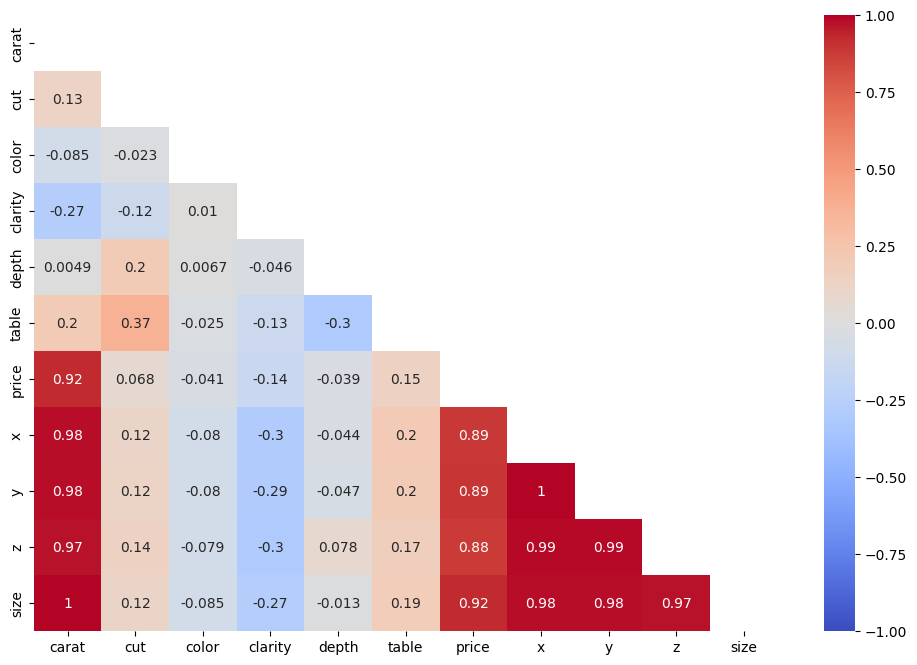

In [36]:
plt.figure(figsize=(12,8))
corr = df.corr()

# Maske oluştur
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(df.corr(), mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Modeling

In [16]:
# şimdi fiyatini en çok ne etliliyor
df.corr(numeric_only=True)["price"].sort_values(ascending=False)

price      1.000000
size       0.924203
carat      0.922060
y          0.890772
x          0.888384
z          0.880835
table      0.147576
cut        0.067915
depth     -0.039013
color     -0.040590
clarity   -0.142895
Name: price, dtype: float64

In [17]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'size'],
      dtype='object')

In [18]:
x=df[['carat', 'cut','size','table']]
y=df['price']

x1,x2,y1,y2=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
model = LinearRegression()
model.fit(x1, y1)
model.score(x2, y2)  # LinearRegression Score

0.8575227875822525

In [20]:
from regression_function import algo_test as at
at(x,y)

R_Squared          RMSE           MAE
Gradient Boosting    8.751182e-01  1.458958e+03  8.052576e+02
XGBRegressor         8.621316e-01  1.532941e+03  8.331293e+02
mlp_regressor        8.617713e-01  1.534943e+03  9.760835e+02
KNeighborsRegressor  8.596239e-01  1.546820e+03  9.675475e+02
Linear               8.575228e-01  1.558353e+03  1.016796e+03
Ridge                8.574256e-01  1.558885e+03  1.017097e+03
ElasticNet           8.571978e-01  1.560129e+03  1.016937e+03
Lasso                8.571839e-01  1.560205e+03  1.017755e+03
AdaBoost             8.560881e-01  1.566179e+03  8.787050e+02
Extra Tree           7.531412e-01  2.051244e+03  1.119724e+03
Decision Tree        7.427869e-01  2.093822e+03  1.154162e+03
SVR                  1.105193e-01  3.893690e+03  2.285572e+03
SGD                 -4.936515e+17  2.900704e+12  2.448716e+12

In [28]:
# En yüksek değeri gradian boster ile verdi 

In [21]:
pred=model.predict(x2)
result = pd.DataFrame({'Real': y2, 'Predict': pred})

In [22]:
result.head()

Real      Predict
508    2822  3284.206250
8596   4441  5712.838490
32730   802   205.462742
10146  4724  5494.842106
43257  1400  1869.904948

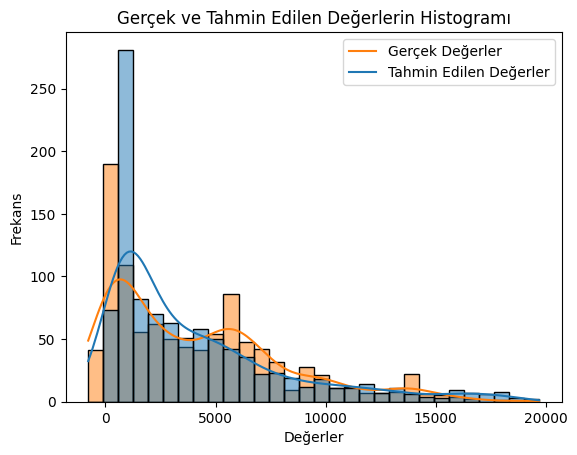

In [23]:
sns.histplot(result, kde=True, alpha=0.5, bins=30)
plt.xlabel('Değerler')
plt.ylabel('Frekans')
plt.title('Gerçek ve Tahmin Edilen Değerlerin Histogramı')
plt.legend(labels=['Gerçek Değerler', 'Tahmin Edilen Değerler'])
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from sklearn.model_selection import train_test_split 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Çıkış katmanı: regresyon için tek bir çıktı
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50, verbose=1)

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 29999078.0000
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12573537.0000
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5393285.5000
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3864040.0000
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2821057.0000
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2560379.0000
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2335151.0000
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2200814.7500
Epoch 9/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2226923.0000
Epoch 10/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2279814.2500
Epoch 11/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2271633.0000
Epoch 12/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2225075.7500
Epoch 13/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2264921.0000
Epoch 14/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2

In [25]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
result['prediction'] = y_pred

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Mean Squared Error: 2225084.1100771544


In [30]:
from sklearn.metrics import r2_score
y_pred = model.predict(x_test)

# R^2 değerini hesaplayalım
r2 = r2_score(y_test, y_pred)
r2

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.8694550202599792

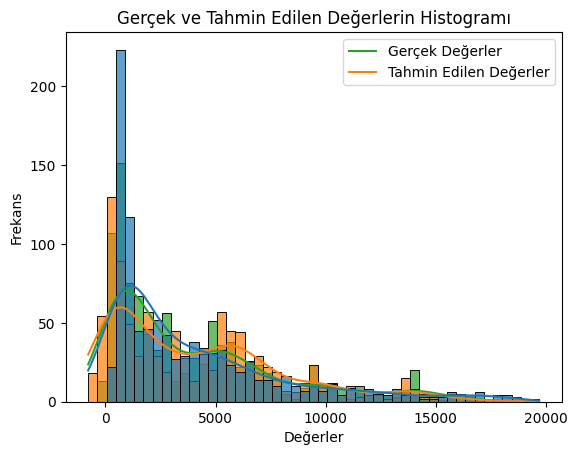

In [26]:
sns.histplot(result, kde=True, alpha=0.7, bins=49)
plt.xlabel('Değerler')
plt.ylabel('Frekans')
plt.title('Gerçek ve Tahmin Edilen Değerlerin Histogramı')
plt.legend(labels=['Gerçek Değerler', 'Tahmin Edilen Değerler'])
plt.show()

In [27]:
result.head()

Real      Predict   prediction
508    2822  3284.206250  2611.213379
8596   4441  5712.838490  5120.655762
32730   802   205.462742   448.991272
10146  4724  5494.842106  4950.209473
43257  1400  1869.904948  1607.485840

In [32]:
# Yüzde  86 R**2 değeri ile modelimizi güzelce eğittik 

In [33]:
df.head()

carat  cut  color  clarity  depth  table  price     x     y     z  \
1388    0.24    1      6        6   62.1   56.0    559  3.97  4.00  2.47   
50052   0.58    4      5        5   60.0   57.0   2201  5.44  5.42  3.26   
41645   0.40    1      1        5   62.1   55.0   1238  4.76  4.74  2.95   
42377   0.43    2      1        5   60.8   57.0   1304  4.92  4.89  2.98   
17244   1.55    1      1        1   62.3   55.0   6901  7.44  7.37  4.61   

             size  
1388    39.223600  
50052   96.120448  
41645   66.559080  
42377   71.695224  
17244  252.779208

# Yeni değerleri Tahmin Etme

In [42]:
a = float(input("Carat Size: "))
b = int(input("Cut Type (Ideal: 1, Premium: 2, Good: 3, Very Good: 4, Fair: 5): "))
c = float(input("Size: "))
d = float(input('Tabel: '))
features = np.array([[a, b, c,d]])
print("Predicted Diamond's Price = ", model.predict(features))

Carat Size: 0.60
Cut Type (Ideal: 1, Premium: 2, Good: 3, Very Good: 4, Fair: 5): 4
Size: 95
Tabel: 55
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Diamond's Price =  [[1869.8873]]
